# Comparando distintos modelos de Q-Learn (variando los hiperparametros)

In [45]:
from q_learn import Q_Model
import gym
import numpy as np
import matplotlib.pyplot as plt

env_train = gym.make('FrozenLake-v1')
env_test = gym.make('FrozenLake-v1', render_mode='human')

### Modelo 1:

EPISODES=6000,
MAX_STEPS=100,
LEARNING_RATE=0.81,
GAMMA=0.96,
epsilon=0.9


Mean reward:  0.25783333333333336


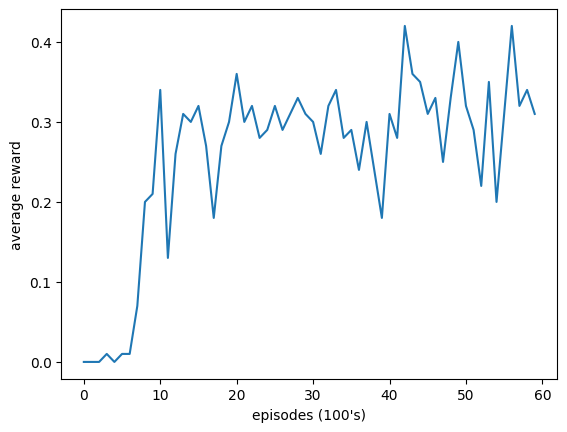

In [11]:
m1 = Q_Model(env_train, env_test)

rewards = m1.train_q_table(EPISODES=6000,
                           MAX_STEPS=100,
                           LEARNING_RATE=0.81,
                           GAMMA=0.96,
                           epsilon=0.9,
                           RENDER=False)

m1.plot_rewards(rewards)

### Modelo 2:

EPISODES=6000,
MAX_STEPS=100,
LEARNING_RATE=0.81,
GAMMA=0.99,
epsilon=0.9


Mean reward:  0.469


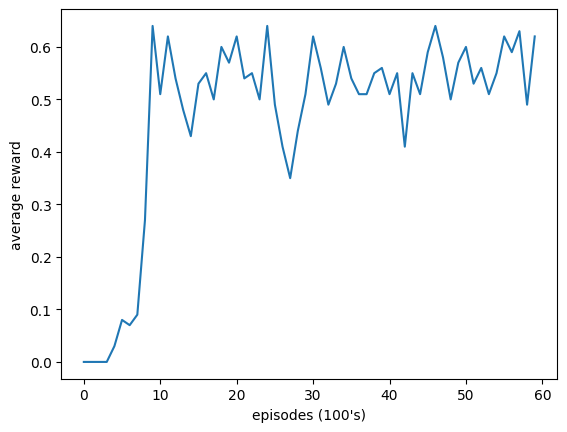

In [13]:
m2 = Q_Model(env_train, env_test)

rewards = m2.train_q_table(EPISODES=6000,
                           MAX_STEPS=100,
                           LEARNING_RATE=0.81,
                           GAMMA=0.99,
                           epsilon=0.9,
                           RENDER=False)

m2_mean_reward = m2.plot_rewards(rewards)

### Modelo 3:

EPISODES=6000,
MAX_STEPS=100,
LEARNING_RATE=0.81,
GAMMA=0.96,
epsilon=0.7


Mean reward:  0.6115


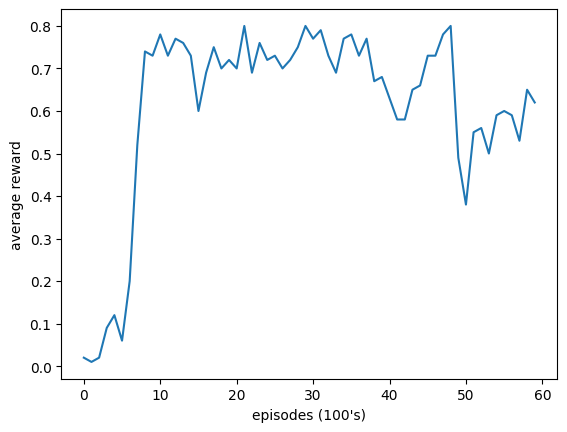

In [19]:
m3 = Q_Model(env_train, env_test)

rewards = m3.train_q_table(EPISODES=6000,
                           MAX_STEPS=100,
                           LEARNING_RATE=0.81,
                           GAMMA=0.96,
                           epsilon=0.7,
                           RENDER=False)

m3.plot_rewards(rewards)

### Modelo 4:

EPISODES=6000,
MAX_STEPS=100,
LEARNING_RATE=0.81,
GAMMA=0.99,
epsilon=0.7


Mean reward:  0.648


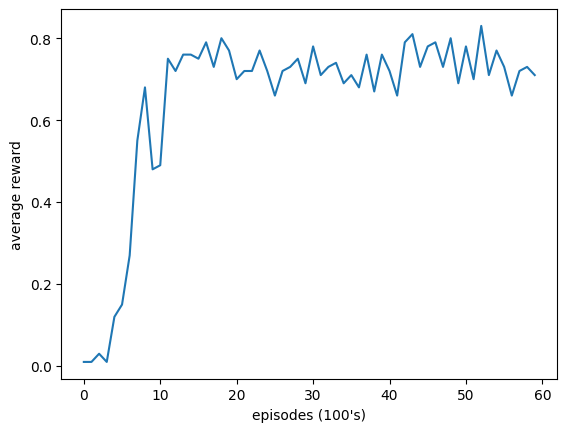

In [17]:
m4 = Q_Model(env_train, env_test)

rewards = m4.train_q_table(EPISODES=6000,
                           MAX_STEPS=100,
                           LEARNING_RATE=0.81,
                           GAMMA=0.99,
                           epsilon=0.7,
                           RENDER=False)

m4.plot_rewards(rewards)

### Modelo 5:

EPISODES=6000,
MAX_STEPS=100,
LEARNING_RATE=0.3,
GAMMA=0.96,
epsilon=0.9


Mean reward:  0.6226666666666667


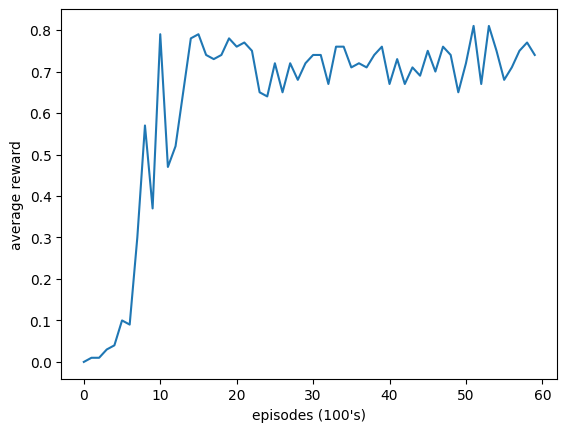

In [23]:
m5 = Q_Model(env_train, env_test)

rewards = m5.train_q_table(EPISODES=6000,
                           MAX_STEPS=100,
                           LEARNING_RATE=0.3,
                           GAMMA=0.96,
                           epsilon=0.9,
                           RENDER=False)

m5.plot_rewards(rewards)

### Comparando dinamicamente

In [30]:
EPSILONS = [0.1, 0.5, 0.6, 0.9]
GAMMAS = [0.1, 0.5, 0.6, 0.9, 0.95, 0.99]

rws = []

for epsilon in EPSILONS:
    for gamma in GAMMAS:
        model = Q_Model(env_train, env_test)
        rewards = model.train_q_table(EPISODES=10000,
                                    MAX_STEPS=100,
                                    LEARNING_RATE=0.81,
                                    GAMMA=gamma,
                                    RENDER=False,
                                    epsilon=epsilon)
        model_mean_reward = np.mean(rewards)
        rws.append((gamma, epsilon, model_mean_reward, rewards))

rws.sort(key=lambda x: x[2], reverse=True)

c:\Users\sebas\Proyectos\Reinforcement-Learning-Introduction\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Model Summary
Best gamma: 0.99
Best epsilon: 0.9
Mean reward:  0.51955


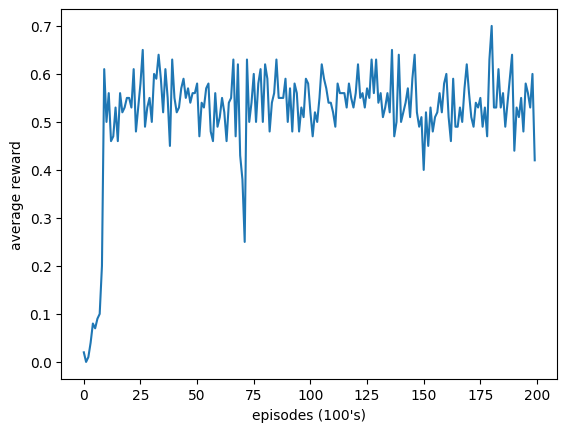

In [44]:
best_gamma, best_epsilon, best_mean_reward, best_rewards = rws[0]

best_model = Q_Model(env_train, env_test)
best_rewards = best_model.train_q_table(EPISODES=20000,
                              MAX_STEPS=100,
                              LEARNING_RATE=0.81,
                              GAMMA=best_gamma,
                              RENDER=False,
                              epsilon=best_epsilon)

print("Model Summary")
print("Best gamma:", best_gamma)
print("Best epsilon:", best_epsilon)

model.plot_rewards(best_rewards)

## Comparacion doble en plot

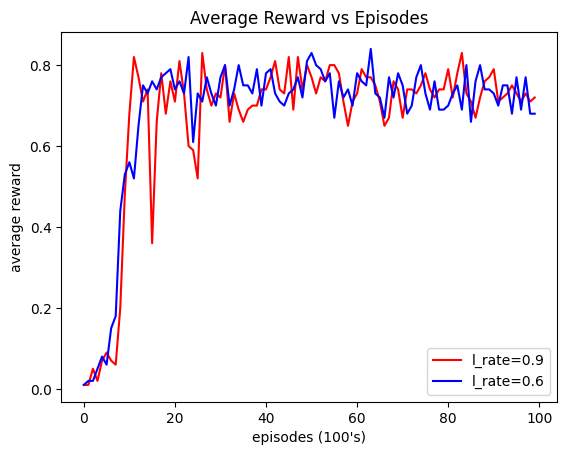

In [48]:
model_A = Q_Model(env_train, env_test)
rewards_A = model_A.train_q_table(EPISODES=20000,
                      MAX_STEPS=100,
                      LEARNING_RATE=0.9,
                      GAMMA=best_gamma,
                      RENDER=False,
                      epsilon=best_epsilon)

model_B = Q_Model(env_train, env_test)
rewards_B = model_B.train_q_table(EPISODES=20000,
                      MAX_STEPS=100,
                      LEARNING_RATE=0.6,
                      GAMMA=best_gamma,
                      RENDER=False,
                      epsilon=best_epsilon)

avg_rewards_A = []
avg_rewards_B = []
get_average = lambda x: sum(x)/len(x)

for i in range(0, len(rewards), 100):
    avg_rewards_A.append(get_average(rewards_A[i:i+100])) 
    avg_rewards_B.append(get_average(rewards_B[i:i+100]))    
        
plt.plot(avg_rewards_A, color='red', label='l_rate=0.9')
plt.plot(avg_rewards_B, color='blue', label='l_rate=0.6')
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.title("Average Reward vs Episodes")
plt.legend()
plt.show()
